https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]])
print('A')
print(A)

A
[[0 1 0 0]
 [0 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]


In [19]:
X = np.array([
            [i, -i]
            for i in range(A.shape[0])
            ])
print('X')
print(X)

X
[[ 0  0]
 [ 1 -1]
 [ 2 -2]
 [ 3 -3]]


In [18]:
print('AX')
print(A @ X)

AX
[[ 1 -1]
 [ 5 -5]
 [ 1 -1]
 [ 2 -2]]


In [22]:
A_hat = A + np.eye(A.shape[0])
print('A_hat')
print(A_hat)

A_hat
[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]


In [23]:
print('A_hat @ X')
print(A_hat @ X)

A_hat @ X
[[ 1. -1.]
 [ 6. -6.]
 [ 3. -3.]
 [ 5. -5.]]


In [24]:
D = np.diag(np.sum(A, axis=1))
print('D')
print(D)

D
[[1 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 2]]


In [19]:
np.linalg.inv(D)

array([[1. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.5]])

In [22]:
np.linalg.inv(D) @ A_hat

array([[1. , 1. , 0. , 0. ],
       [0. , 0.5, 0.5, 0.5],
       [0. , 1. , 1. , 0. ],
       [0.5, 0. , 0.5, 0.5]])

In [21]:
np.linalg.inv(D) @ A @ X

array([[ 1. , -1. ],
       [ 2.5, -2.5],
       [ 1. , -1. ],
       [ 1. , -1. ]])

In [25]:
W = np.array([
             [1, -1],
             [-1, 1]
         ])
W

array([[ 1, -1],
       [-1,  1]])

In [25]:
D_hat = np.diag(np.sum(A_hat, axis=1))
print('D_hat')
print(D_hat)

D_hat
[[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 3.]]


In [28]:
print('inv(D_hat) @ A_hat @ X')
print(np.linalg.inv(D_hat) @ A_hat @ X)

inv(D_hat) @ A_hat @ X
[[ 0.5        -0.5       ]
 [ 2.         -2.        ]
 [ 1.5        -1.5       ]
 [ 1.66666667 -1.66666667]]


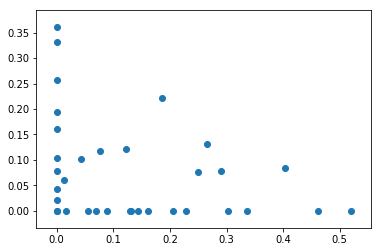

In [70]:
from networkx import karate_club_graph, to_numpy_array
from torch.nn import ReLU

zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))

A = to_numpy_array(zkc, nodelist=order)
A_hat = A + np.eye(zkc.number_of_nodes())
D_hat = np.diag(np.sum(A_hat, axis=1))
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

def relu(x):
    return np.maximum(x, 0)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(np.linalg.inv(D_hat) @ A_hat @ X @ W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

plt.scatter(H_2[:,0], H_2[:,1])